# 기본 예시 : 프롬프트 + 모델 + 출력 파서

가장 기본적이고 일반적인 사용 사례는 prompt 템플릿과 모델을 함께 연결하는 하는 것이다.
이것이 어떻게 작동하는지 보기 위해, 각 나라별 수도를 물어보는 Chain을 생성 해보자.


In [3]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [4]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("langchain_test")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain_test


# 프롬프트 템플릿의 활용

`PromptTemplate`

- 사용자의 입력 변수를 사용하여 완전한 프롬프트 문자열을 만드는데 사용되는 템플릿
- 사용법
  - `template` : 템플릿 문자열. 이 문자열 내에서 중괄호 {} 는 변수를 나타냄
  - `input_variables` : 중괄호 안에 들어갈 변수의 이름을 리스트로 정의.

`input_variables`

- input_variables는 PromptTemplate 에서 사용되는 변수의 이름을 정의하는 리스트


In [5]:
from langchain_teddynote.messages import stream_response
from langchain_core.prompts import PromptTemplate

from_template() 메소드를 사용하여 PromptTemplate 객체 생성


In [8]:
# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template의 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

In [9]:
# prompt 생성
prompt = prompt_template.format(country="대한민국")
prompt

'대한민국의 수도는 어디인가요?'

In [10]:
# prompt 생성
prompt = prompt_template.format(country="미국")
prompt

'미국의 수도는 어디인가요?'

In [39]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", max_tokens=2000, temperature=0.6)

# Chain 생성

## LCEL(Langchain Expression Language)

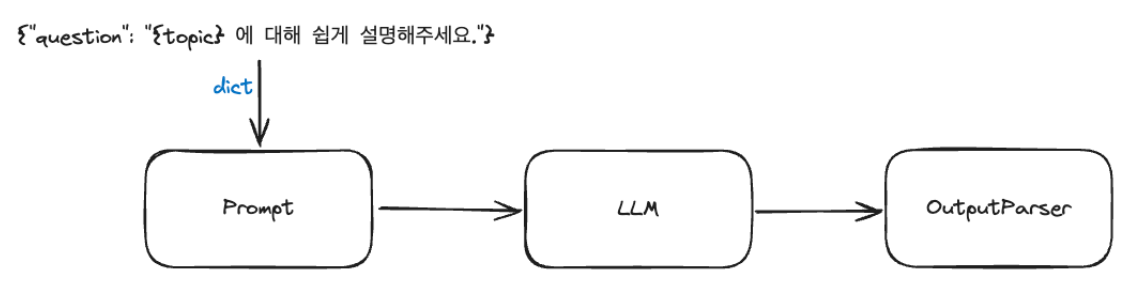

여기서 우리는 LCEL을 사용하여 다양한 구성요소를 단일 체인으로 결합할 것이다.

`chain = prompt | model | out_parser`

`|` 기호는 unix 파이프 연산자와 유사하며, 서로 다른 구성요소를 연결하고 한 구성요소의 출력을 다음 구성 요소의 입력으로 전달한다.

이 체인에서 사용자 입력은 프롬프트 템플릿으로 전달되고, 후에 프롬프트 템플릿 출력은 모델로 전달된다.
각 구성 요소를 개별적으로 살펴보면 무슨일이 일어나고 있는지 이해할 수 있습니다.


In [43]:
# prompt 를 PromptTemplate 객체로 생성
prompt = PromptTemplate.from_template("{topic}에 대해 {how} 설명해주세요.")

model = ChatOpenAI()

chain = prompt | model

In [44]:
chain

PromptTemplate(input_variables=['how', 'topic'], input_types={}, partial_variables={}, template='{topic}에 대해 {how} 설명해주세요.')
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x137d4d490>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x137d4f110>, root_client=<openai.OpenAI object at 0x137d43260>, root_async_client=<openai.AsyncOpenAI object at 0x137d4c530>, model_kwargs={}, openai_api_key=SecretStr('**********'))

## invoke() 호출

- python 딕셔너리 형태로 입력값을 전달(키:값)
- invoke() 함수 호출 시, 입력값을 전달


In [45]:
# input 딕셔너리에 주제를 '인공지능 모델의 학습원리'로 설정
input = {"topic": "인공지능 모델의 학습원리", "how": "초등학생도 이해하기 쉽게"}

In [46]:
# prompt 객체와 model 객체를 파이프 (|) 연산자로 연결하고 invoke 메서드를 사용하여 input을 전달
# 이를 통해 AI 모델이 생성한 메시지 반환
chain.invoke(input)

AIMessage(content='인공지능 모델의 학습원리는 우리가 수학 문제를 푸는 것과 비슷해요. 예를 들어, 우리가 덧셈 문제를 푸는 것처럼 인공지능 모델도 데이터를 입력받고 그 데이터를 이용해서 패턴을 찾아내는 거죠. \n\n인공지능 모델은 수많은 데이터를 학습해서 그 데이터들 사이에 숨겨진 규칙이나 패턴을 발견해요. 그리고 그 패턴을 바탕으로 새로운 데이터를 예측하거나 분류할 수 있어요. 이렇게 모델이 학습을 하면서 점점 더 정확하고 효율적인 결정을 내릴 수 있게 되는 거죠. \n\n그래서 인공지능 모델은 계속해서 학습을 반복하면서 더 나은 성능을 발휘할 수 있어요. 이렇게 인공지능 모델은 데이터를 통해 스스로 배우고 발전해나가는 거죠.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 311, 'prompt_tokens': 42, 'total_tokens': 353, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c84bba83-e3ee-460c-9474-3fbc1fdafd2a-0', usage_metadata={'input_tokens': 42, 'output_tokens': 311, 'total_tokens': 353, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [47]:
answer = chain.stream(input)
stream_response(answer)

인공지능 모델의 학습은 우리가 수학 문제를 푸는 것과 비슷해요. 예를 들어, 우리가 고양이와 개를 구별하는 문제를 풀 때, 인공지능 모델은 수많은 사진을 보고 고양이와 개를 구분하는 법을 배워요. 모델은 사진을 보면서 고양이와 개의 차이를 찾아내고, 이를 기억해요. 그리고 새로운 사진이 주어지면 이전에 배운 정보를 바탕으로 고양이와 개를 잘 구분할 수 있어요. 이렇게 반복해서 학습을 하면, 모델은 점점 더 정확하게 고양이와 개를 구별할 수 있게 되는 거죠. 이런 식으로 모델은 데이터를 토대로 패턴을 찾아가면서 학습을 하게 되어요.

## 출력 파서(Output Parser)

In [29]:
from langchain_core.output_parsers import StrOutputParser   # 문자열로 바꿔주는 파서

output_parser = StrOutputParser()

Chain에 출력파서를 추가

In [48]:
# 프롬프트, 모델, 출력 파서를 연결하여 처리 체인 구성
chain = prompt | model | output_parser

In [49]:
# chain 객체의 invoke 메서드를 이용하여 Input 전달
input = {"topic" : "코딩을 잘하는 방법", "how" : "가장 쉽게"}
chain.invoke(input) 

# StrOutputParser를 썼기 때문에 content안의 문자열이 바로 출력 되게 된다.

'코딩을 잘하는 방법은 다음과 같습니다:\n\n1. 기본 개념 숙지: 먼저 프로그래밍 언어의 기본 개념을 이해하고 숙지해야 합니다. 변수, 조건문, 반복문, 함수 등의 기본적인 개념을 이해하는 것이 중요합니다.\n\n2. 많은 연습: 코딩은 실습을 통해 능숙해질 수 있는 기술입니다. 많은 문제를 풀어보고 다양한 프로젝트를 진행해보면서 실력을 향상시킬 수 있습니다.\n\n3. 다른 사람의 코드 분석: 다른 사람이 작성한 코드를 분석하고 이해하는 것도 중요합니다. 다른 사람의 코드를 읽고 분석함으로써 새로운 아이디어를 얻을 수 있고, 코딩 스타일을 향상시킬 수 있습니다.\n\n4. 계획 및 구조화: 코딩을 시작하기 전에 충분한 계획을 세우고 코드를 구조화하는 것이 중요합니다. 코드의 구조를 잘 만들면 유지보수가 쉬워지고 버그를 찾기도 쉬워집니다.\n\n5. 지속적인 학습: 코딩은 끊임없는 학습이 필요한 분야입니다. 새로운 기술이나 언어를 배우고, 최신 트렌드를 따라가며 계속해서 학습하는 습관을 가지는 것이 중요합니다.'

In [50]:
stream_response(chain.stream(input))

코딩을 잘하는 방법은 다양하지만, 기본적으로는 많은 연습과 노력이 필요합니다. 또한 아래와 같은 방법들을 따르면 도움이 될 수 있습니다:

1. 기초 개념을 잘 이해하기: 프로그래밍 언어의 기본 문법과 개념을 잘 이해하는 것이 중요합니다. 이를 토대로 문제를 해결하는 방법을 찾을 수 있습니다.

2. 많이 코딩해보기: 많은 경험을 쌓는 것이 중요합니다. 자주 코딩을 해보고 다양한 문제를 해결해보면서 코딩 스킬을 향상시킬 수 있습니다.

3. 다른 사람의 코드를 읽고 이해하기: 다른 사람들이 작성한 코드를 읽고 분석하는 것은 코딩 실력 향상에 도움이 됩니다. 다양한 코드를 읽어보며 다른 사람의 사고 방식을 공부해보세요.

4. 프로젝트에 참여하기: 혼자서 프로젝트를 진행해보거나 오픈소스 프로젝트에 참여해보는 것도 좋은 방법입니다. 다른 사람들과 협업하며 코딩하는 경험을 쌓을 수 있습니다.

5. 지속적으로 학습하기: 코딩은 끊임없는 학습과 발전이 필요한 분야입니다. 새로운 기술과 트렌드를 계속해서 익히고 적용해보며 자기계발에 노력을 기울이세요.

## 템플릿을 변경하여 적용
- 아래의 프롬프트 내용을 얼마든지 변경하여 테스트 가능
- `model_name`역시 변경하여 테스트 가능

In [35]:
template = """
당신은 영어를 가르치는 10년차 영어 선생님입니다. 주어진 상황에 맞는 영어회화를 작성해주세요.
양식은 [format]을 참고하여 작성해주세요.

# 상황 : 
{question}

#format:
- 영어 회화 : 
- 한글 해석 : 
"""

# 프롬프트 템플릿을 이용하여 프롬프트를 생성
prompt = PromptTemplate.from_template(template)

# ChatOpenAI 챗 모델 초기화
model = ChatOpenAI(model_name = "gpt-4o-mini")

#문자열 출력 파서 초기화
output_parser = StrOutputParser()

#체인 구성
chain = prompt | model | output_parser

In [36]:
# 완성된 chain을 실행하여 답변얻기
answer=chain.stream({"question": "저는 캐나다에서 영주권을 따고, 여유있게 살고싶어요"})

print(stream_response(answer))

- 영어 회화:  
A: Why did you decide to move to Canada?  
B: I wanted to get my permanent residency and live comfortably.  
A: That sounds great! What do you love most about living there?  
B: I really enjoy the quality of life and the multicultural environment.  

- 한글 해석:  
A: 왜 캐나다로 이사하기로 결심했어요?  
B: 영주권을 따고 여유롭게 살고 싶었어요.  
A: 정말 멋지네요! 그곳에서 가장 좋아하는 점은 무엇인가요?  
B: 저는 삶의 질과 다문화 환경이 정말 좋습니다.None
